In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mf
import seaborn as sns
import plotly.express as px

In [2]:
path = r'NVDA.csv'
data = pd.read_csv(path)
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,28/11/2022,15.812541,15.827000,16.357000,15.725,16.025999,303741000
1,29/11/2022,15.624713,15.639000,15.932000,15.520,15.827000,298384000
2,30/11/2022,16.911863,16.923000,16.930000,15.597,15.697000,565298000
3,01/12/2022,17.123726,17.135000,17.264999,16.635,16.999001,470977000
4,02/12/2022,16.864895,16.875999,16.933001,16.445,16.659000,371389000


In [4]:
# Cell 2: Handle Missing Data
def handle_missing_data(df):
    """
    Check for missing data
    """
    print("Missing Data Summary:\n", df.isnull().sum())
    return df.fillna(data.mean(numeric_only=True), inplace=True)

data_cleaned = handle_missing_data(data)


Missing Data Summary:
 Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [5]:
# Cell 3: Prepare Date Features
def prepare_date_features(df):
    """
    Convert the Date column to datetime and extract Year, Month, and Day of Week.
    """
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month_name()
    df['DayOfWeek'] = df['Date'].dt.day_name()
    return df

data_prepared = prepare_date_features(data_cleaned)
data_prepared.head()


,Date,Adj Close,Close,High,Low,Open,Volume,Year,Month,DayOfWeek
0,2022-11-28,15.812541,15.827000,16.357000,15.725,16.025999,303741000,2022,November,Monday
1,2022-11-29,15.624713,15.639000,15.932000,15.520,15.827000,298384000,2022,November,Tuesday
2,2022-11-30,16.911863,16.923000,16.930000,15.597,15.697000,565298000,2022,November,Wednesday
3,2022-12-01,17.123726,17.135000,17.264999,16.635,16.999001,470977000,2022,December,Thursday
4,2022-12-02,16.864895,16.875999,16.933001,16.445,16.659000,371389000,2022,December,Friday


C:\Users\R\AppData\Local\Temp\ipykernel_3988\4274281196.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', palette='viridis')


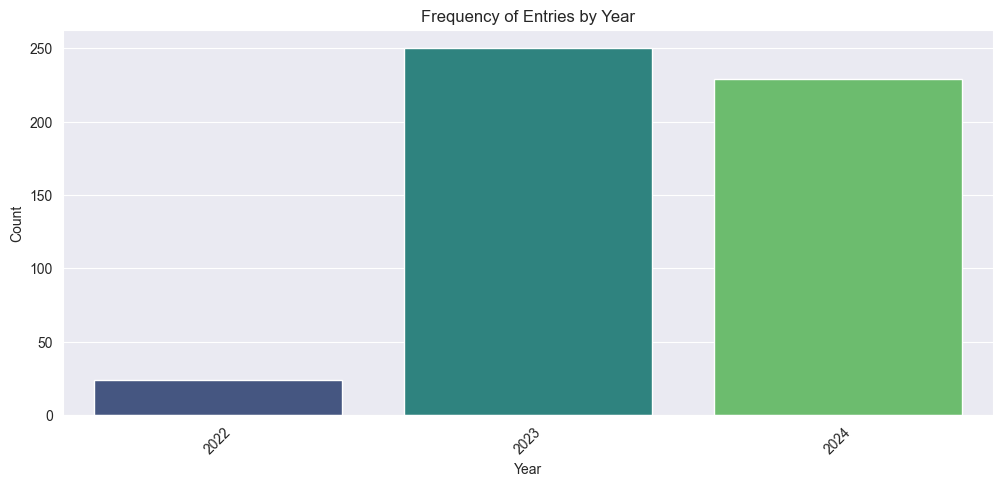

C:\Users\R\AppData\Local\Temp\ipykernel_3988\4274281196.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Month', order=[


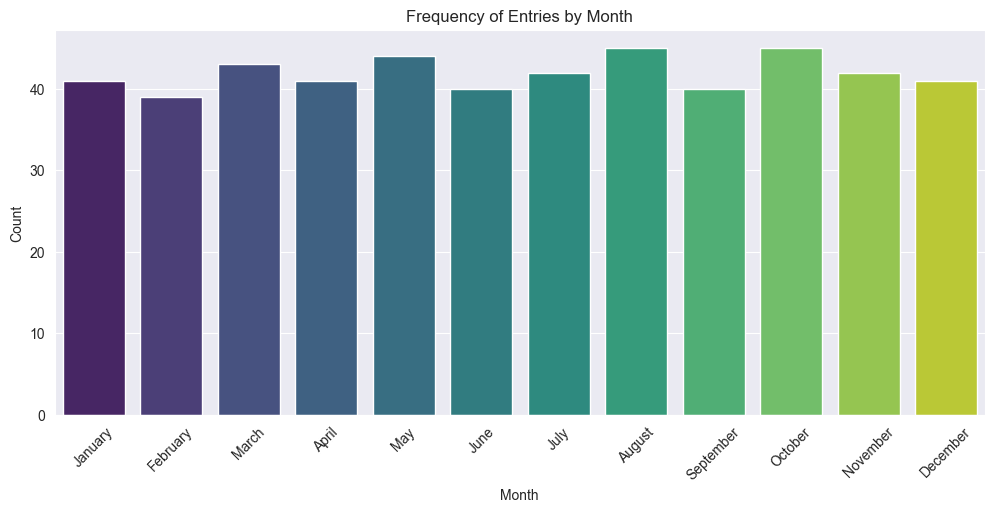

In [6]:
# Cell 4: Plot Frequency by Year and Month
def plot_frequency_by_year_and_month(df):
    """
    Plot the frequency of data entries by Year and Month.
    """
    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x='Year', palette='viridis')
    plt.title('Frequency of Entries by Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    
    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x='Month', order=[
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ], palette='viridis')
    plt.title('Frequency of Entries by Month')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

plot_frequency_by_year_and_month(data_prepared)


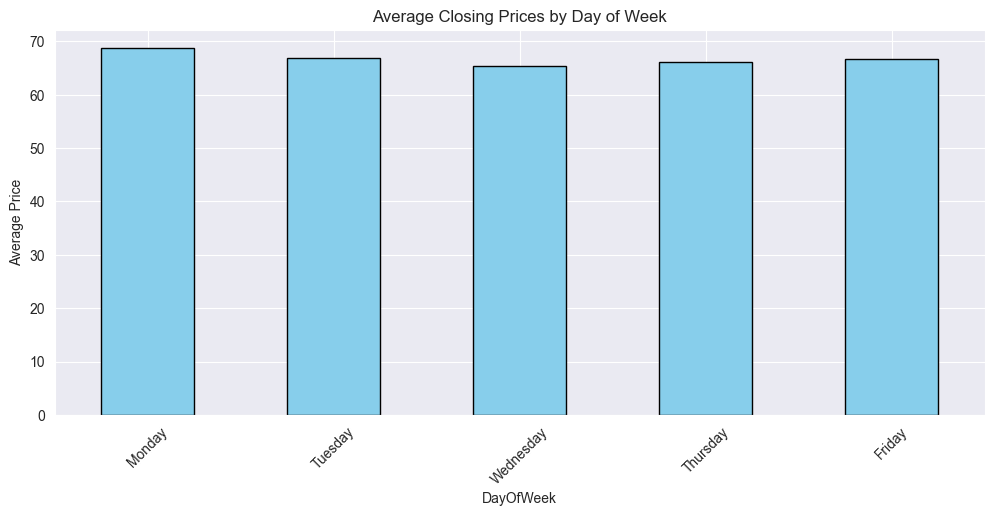

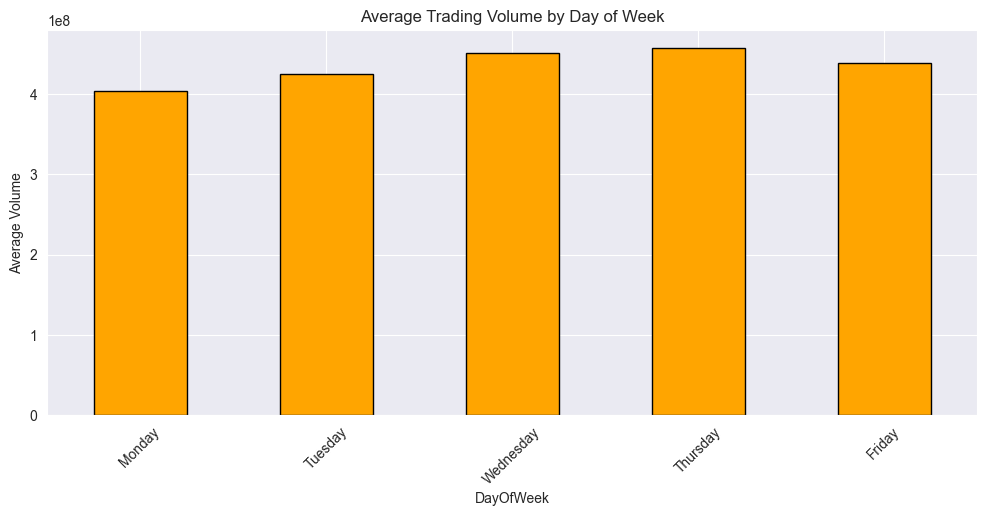

In [7]:
# Cell 5: Analyze Stock Prices and Volume by Day of Week
def plot_prices_by_day_of_week(df):
    """
    Plot average stock prices (Close) and trading volume by Day of Week.
    """
    avg_prices = df.groupby('DayOfWeek')['Close'].mean().reindex([
        "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"
    ])
    avg_volume = df.groupby('DayOfWeek')['Volume'].mean().reindex([
        "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"
    ])
    
    plt.figure(figsize=(12, 5))
    avg_prices.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Average Closing Prices by Day of Week')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(12, 5))
    avg_volume.plot(kind='bar', color='orange', edgecolor='black')
    plt.title('Average Trading Volume by Day of Week')
    plt.ylabel('Average Volume')
    plt.xticks(rotation=45)
    plt.show()

plot_prices_by_day_of_week(data_prepared)


C:\Users\R\AppData\Local\Temp\ipykernel_3988\3408376252.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='DayOfWeek', y='Close', order=[


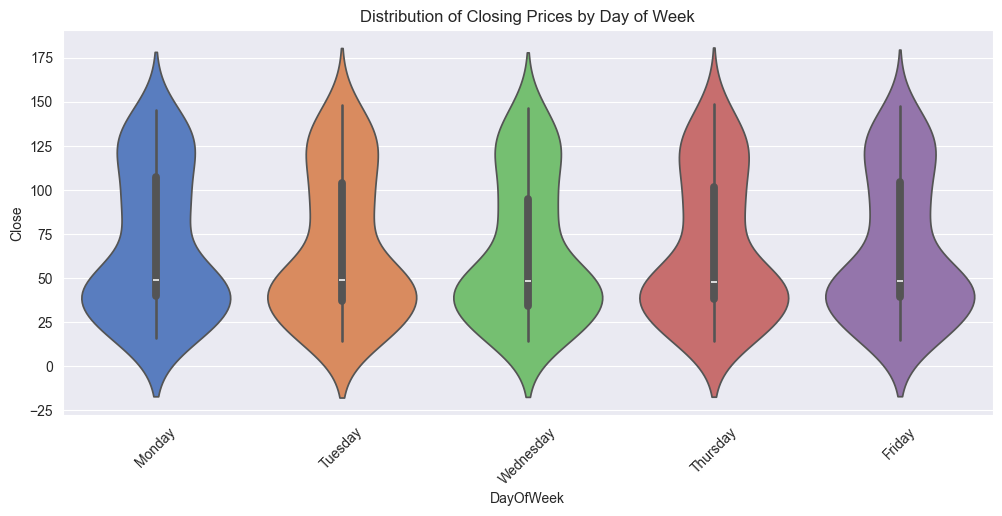

In [8]:

def plot_violin_plot(df):
    """
    Create a violin plot for stock prices by Day of Week.
    """
    plt.figure(figsize=(12, 5))
    sns.violinplot(data=df, x='DayOfWeek', y='Close', order=[
        "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"
    ], palette='muted')
    plt.title('Distribution of Closing Prices by Day of Week')
    plt.xticks(rotation=45)
    plt.show()

plot_violin_plot(data_prepared)


C:\Users\R\AppData\Local\Temp\ipykernel_3988\2877478931.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', palette='viridis')


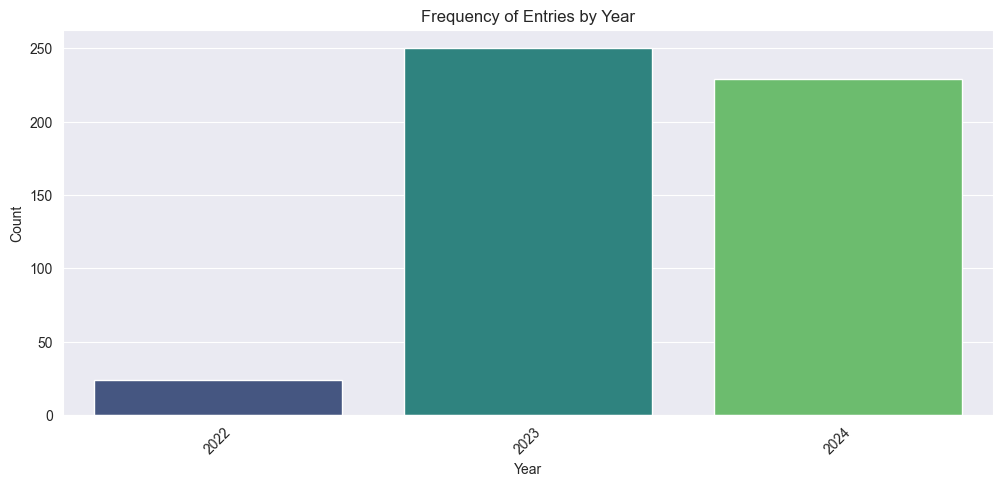

C:\Users\R\AppData\Local\Temp\ipykernel_3988\2877478931.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Month', order=[


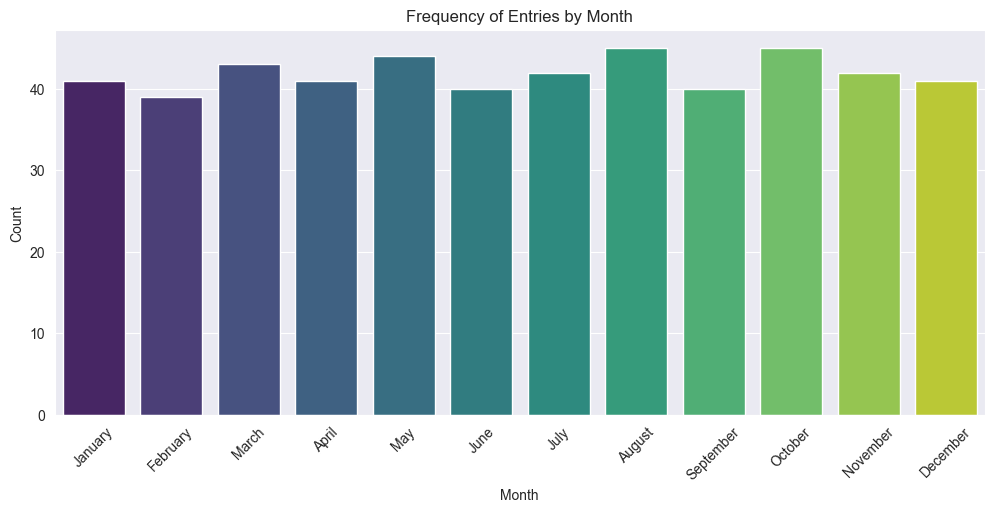

In [9]:
# Distribution of Nominal Variables (Count Plot)
def plot_nominal_distribution(df):
    """
    Plots count plots for nominal variables like Year and Month.
    """
    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x='Year', palette='viridis')
    plt.title('Frequency of Entries by Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    
    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x='Month', order=[
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ], palette='viridis')
    plt.title('Frequency of Entries by Month')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Apply the function
plot_nominal_distribution(data_prepared)


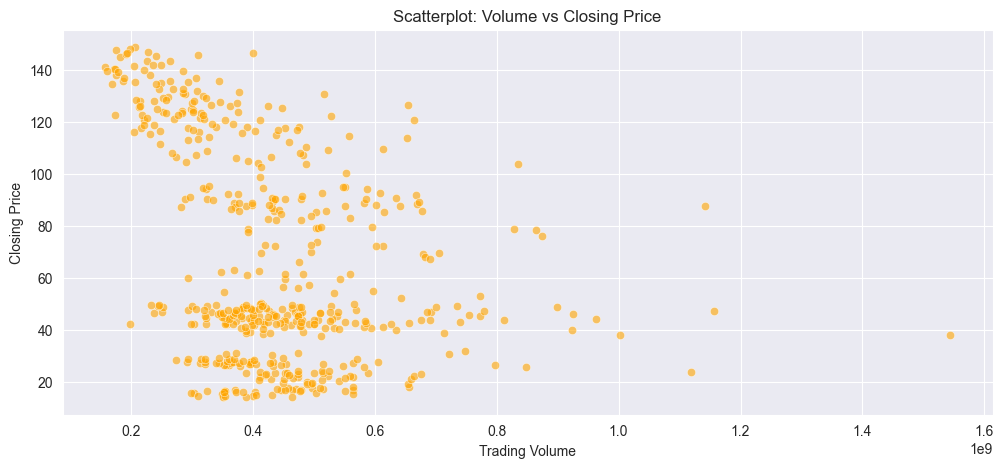

In [10]:
# Comparison of Numeric Variables (Scatterplot)
def plot_scatter_numeric(df):
    """
    Plots scatterplots to visualize relationships between numeric variables.
    """
    plt.figure(figsize=(12, 5))
    sns.scatterplot(data=df, x='Volume', y='Close', alpha=0.6, color='orange')
    plt.title('Scatterplot: Volume vs Closing Price')
    plt.xlabel('Trading Volume')
    plt.ylabel('Closing Price')
    plt.show()

# Apply the function
plot_scatter_numeric(data_prepared)


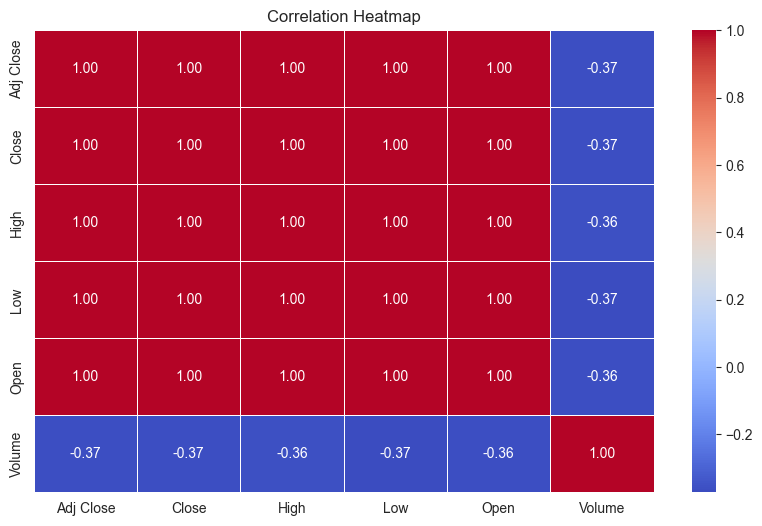

In [11]:
# Heatmap for Correlation
def plot_correlation_heatmap(df):
    """
    Plots a heatmap to show the correlation between numeric variables.
    """
    numeric_cols = df.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numeric_cols.corr()
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

# Apply the function
plot_correlation_heatmap(data_prepared)


C:\Users\R\AppData\Local\Temp\ipykernel_3988\228752691.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='DayOfWeek', y='Close', order=[


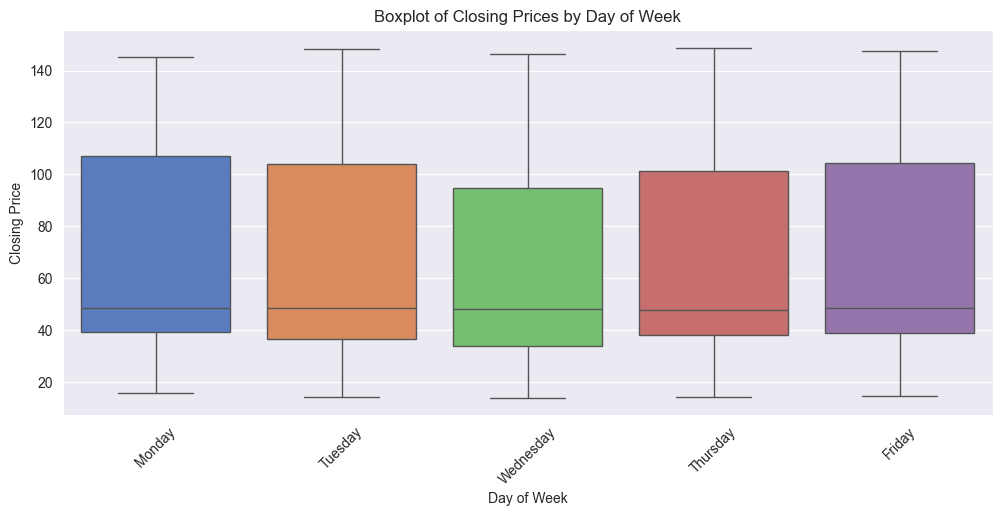

In [12]:
# Boxplot to Compare Values Within Groups
def plot_boxplot(df):
    """
    Plots a boxplot to compare closing prices by day of the week.
    """
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df, x='DayOfWeek', y='Close', order=[
        "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"
    ], palette='muted')
    plt.title('Boxplot of Closing Prices by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Closing Price')
    plt.xticks(rotation=45)
    plt.show()

# Apply the function
plot_boxplot(data_prepared)
